In [1]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style>

In [2]:
# import libraries
from IPython.display import Image  # for displaying images in markdown cells
import pandas as pd  # Dataframe manipulation
import matplotlib.pyplot as plt  # Plot charts
import matplotlib.style as style  # Inherit styles
from matplotlib.pyplot import figure  # to adjust plot figure size
import numpy as np  # Arrays manipulation 
from scipy.stats import gaussian_kde  # in case needed later; gussian to approximate normal distribution graphs / kernel density estimations

# Enables Jupyter to display graphs
%matplotlib inline

# Dataquest - Statistics Fundamentals <br/> <br/> Project Title: Investigating Fandango Movie Ratings

## 1) Is Fandango Still Inflating Ratings?

#### Background
Provided by: [Dataquest.io](https://www.dataquest.io/)

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
- The actual rating was almost always rounded <b>up</b> to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

![title](s1gp_actual_vs_displayed.png)

Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

#### Objectives / Questions:

- In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis

## 2) Understanding the Data 
Provided by: [Dataquest.io](https://www.dataquest.io/)

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time.

#### Metadata:
**fandango_score_comparison.csv (ie. dataset before Fandango fix)**
- Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

| Column | Description |
| --- | --- |
| FILM | The film in question |
| RottenTomatoes | The Rotten Tomatoes Tomatometer score for the film |
| RottenTomatoes_User | The Rotten Tomatoes user score for the film |
| Metacritic | The Metacritic critic score for the film |
| Metacritic_User | The Metacritic user score for the film |
| IMDB | The IMDb user score for the film |
| Fandango_Stars | The number of stars the film had on its Fandango movie page |
| Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained. |
| RT_norm | The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system |
| RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system |
| Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system |
| Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system |
| IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system |
| RT_norm_round | The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_vote_count | The number of user votes the film had on Metacritic |
| IMDB_user_vote_count | The number of user votes the film had on IMDb |
| Fandango_votes | The number of user votes the film had on Fandango |
| Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue |

**movie_ratings_16_17.csv (ie. dataset after Fandango fix)**
- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis. 

| Column | Description |
| --- | --- |
| movie | the name of the movie |
| year | the release year of the movie |
| metascore | the Metacritic rating of the movie (the "metascore" - critic score) |
| imdb | the IMDB rating of the movie (user score) |
| tmeter | the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score) |
| audience | the Rotten Tomatoes rating of the movie (user score) |
| fandango | the Fandango rating of the movie (user score) |
| n_metascore | the metascore normalized to a 0-5 scale |
| n_imdb | the IMDB rating normalized to a 0-5 scale |
| n_tmeter | the tomatometer normalized to a 0-5 scale |
| n_audience | the Rotten Tomatoes user score normalized to a 0-5 scale |
| nr_metascore | the metascore normalized to a 0-5 scale and rounded to the nearest 0.5 |
| nr_imdb | the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5 |
| nr_tmeter | the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5 |
| nr_audience | the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5 |


In [3]:
# Read in and explore briefly the two data sets 
# (fandango_score_comparison.csv and movie_ratings_16_17.csv) 
# to understand their structure.

df_before = pd.read_csv('fandango_score_comparison.csv')
df_after = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
# review fandango dataset before fix
df_before

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [5]:
df_before.info()
df_before.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [6]:
# review movie ratings dataset after fix
df_after

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


In [7]:
df_after.info()
df_after.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [8]:
# Isolate the columns that offer information about Fandango's ratings
# in separate variables so we have just the data we're interested in
# more readily available for later use.


# isolate df_fandango
df_before = df_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

# check transformation
df_before

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [9]:
# isolate movie ratings
df_after = df_after[['movie', 'year', 'fandango', 'audience']]

# check transformation
df_after

,movie,year,fandango,audience
0,10 Cloverfield Lane,2016,3.5,79
1,13 Hours,2016,4.5,83
2,A Cure for Wellness,2016,3.0,47
3,A Dog's Purpose,2017,4.5,76
4,A Hologram for the King,2016,3.0,57
...,...,...,...,...
209,X-Men: Apocalypse,2016,4.0,67
210,XX,2017,3.0,17
211,xXx: Return of Xander Cage,2017,4.0,45
212,Zoolander 2,2016,2.5,21


## 3) Changing The Goal Of Our Analysis

#### README files of datasets:
- **Fandango ("Before-fix"):**
  - fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.
  - The data from Fandango was pulled on Aug. 24, 2015.
- **Movie ratings (2016 and 2017) - IMDB, Fandango, Metacritic, RottenTomatoes ("After-fix"):**
  - movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.
  - As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

#### Findings (Changing The Goal Of Our Analysis):
- It would appear that the two datasets **may not** be 100% suitable for the purpose of our analysis (ie. To check if Fandango's movie ratings are still skewed due to their bug before and after fixes)
  - The two datasets has different time periods (before: 2015 movies, after: 2016/2017 movies)
    - **Timing/Temporal Effect:** Different movies could naturally have different ratings for other reasons (eg. There are better movies released in 2016/2017)
  - fandango_score_comparison.csv (before fix) records movies with at least 30 Fandango fan reviews, while movie_ratings_16_17.csv (after fix) only mentioned including "popular movies" and no number of user ratings in its dataset
    - Popularity of the movies in respective dataset may be different, which could have significant instrinsic impact on movie ratings.
- Due to limitations of datasets, we would suggest to redefine slightly the objectives of this project instead of looking for additional datasets for analysis.

#### Objectives / Questions Redefined:
Previous:
- In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis

Redefined:
- In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis on **popular movies**
  - Reason: We suggest the redefined goals are more suitable given both datasets contains popular movie data, hence we would need to further stratify out popular movies from fandango_score_comparison.csv (before fix) for more representative analysis

## 4) Isolating The Samples We Need
- Population 1 **(Before-Fix)**: All Fandango's ratings for popular movies released in 2015.
- Population 2 **(After-Fix)**: All Fandango's ratings for popular movies released in 2016.

As **Before-Fix Dataset** defined 30 Fandango fan ratings before inclusion in dataset, let us define the same for the **After-Fix Dataset** in order to proceed with analysis.

#### Verifying if populations fit defined criteria:
**Before-Fix Dataset**: Check if all observations have at least 30 Fandango fan ratings.

**After-Fix Dataset**: There are no number of fan ratings on either dataset nor on Fandango website, as Fandango currently powers its rating system with RottenTomato. Hence select 10 samples from dataset on haphazard basis to verify directly from RottenTomato referred from Fandango website. The risk is lower as the creator of dataset has defined the population as popular movies already. 

In [10]:
# Verifying if populations fit defined criteria:
# Before-Fix Dataset:
(df_before['Fandango_votes'] <= 30).sum()

# all samples satisfied -- result of 0 means no 'True' results

0

In [11]:
# Verifying if populations fit defined criteria:
# After-Fix Dataset:
# random_state=3 selected randomly as random seed
df_after_check = df_after.sample(n=10, random_state=3)
df_after_check

,movie,year,fandango,audience
146,Sleepless,2017,4.0,49
25,Bleed for This,2016,4.0,70
163,The Boss,2016,3.5,39
108,Mechanic: Resurrection,2016,4.0,41
83,Jane Got a Gun,2016,3.5,38
197,The Take (Bastille Day),2016,4.0,43
211,xXx: Return of Xander Cage,2017,4.0,45
77,In a Valley of Violence,2016,4.0,54
34,Central Intelligence,2016,4.5,61
203,Underworld: Blood Wars,2016,4.0,55


In [12]:
# As Rotten Tomato website does not display exact numbers eg. 5000+ fan ratings, for checking purposes will round-off 
# and input per below as only require at least 30 fan ratings

df_after_check['fan_ratings_number'] = [5000, 5000, 25000, 25000, 10000, 2500, 25000, 2500, 50000, 10000]
df_after_check

# all samples satisfied -- all popular movies > 30 fan ratings
# proceed with using df_after

,movie,year,fandango,audience,fan_ratings_number
146,Sleepless,2017,4.0,49,5000
25,Bleed for This,2016,4.0,70,5000
163,The Boss,2016,3.5,39,25000
108,Mechanic: Resurrection,2016,4.0,41,25000
83,Jane Got a Gun,2016,3.5,38,10000
197,The Take (Bastille Day),2016,4.0,43,2500
211,xXx: Return of Xander Cage,2017,4.0,45,25000
77,In a Valley of Violence,2016,4.0,54,2500
34,Central Intelligence,2016,4.5,61,50000
203,Underworld: Blood Wars,2016,4.0,55,10000


#### Years of datasets
Both datasets satisfy the 'popular movies' criteria.

However, from previous review, it would appear **Before-Fix** has year under the 'FILM' category which we should analyse it so that the population only includes year 2015 movies.

We should also check if **After-Fix** only contain movies from year 2016 as defined, and transform the data accordingly if needed.

In [13]:
# check year of df_before
df_before['year'] = df_before['FILM'].str[-5:-1]

# check transformation
df_before

/var/folders/8v/dk9_y26j55s49_fpq7389j_h0000gn/T/ipykernel_17326/628707912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['year'] = df_before['FILM'].str[-5:-1]


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0,2014
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [14]:
# check frequency table for year 2015 for df_before
df_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [15]:
# select and keep rows with only year 2015
df_before_clean = df_before[df_before['year'] == '2015']

# check transformation
df_before_clean['year'].value_counts()

2015    129
Name: year, dtype: int64

In [16]:
# check frequency table for year 2015 for df_after
df_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
# select and keep rows with only year 2016
df_after_clean = df_after[df_after['year'] == 2016]

# check transformation
df_after_clean['year'].value_counts()

2016    191
Name: year, dtype: int64

## 5) Comparing Distribution Shapes for 2015 and 2016
- Let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.




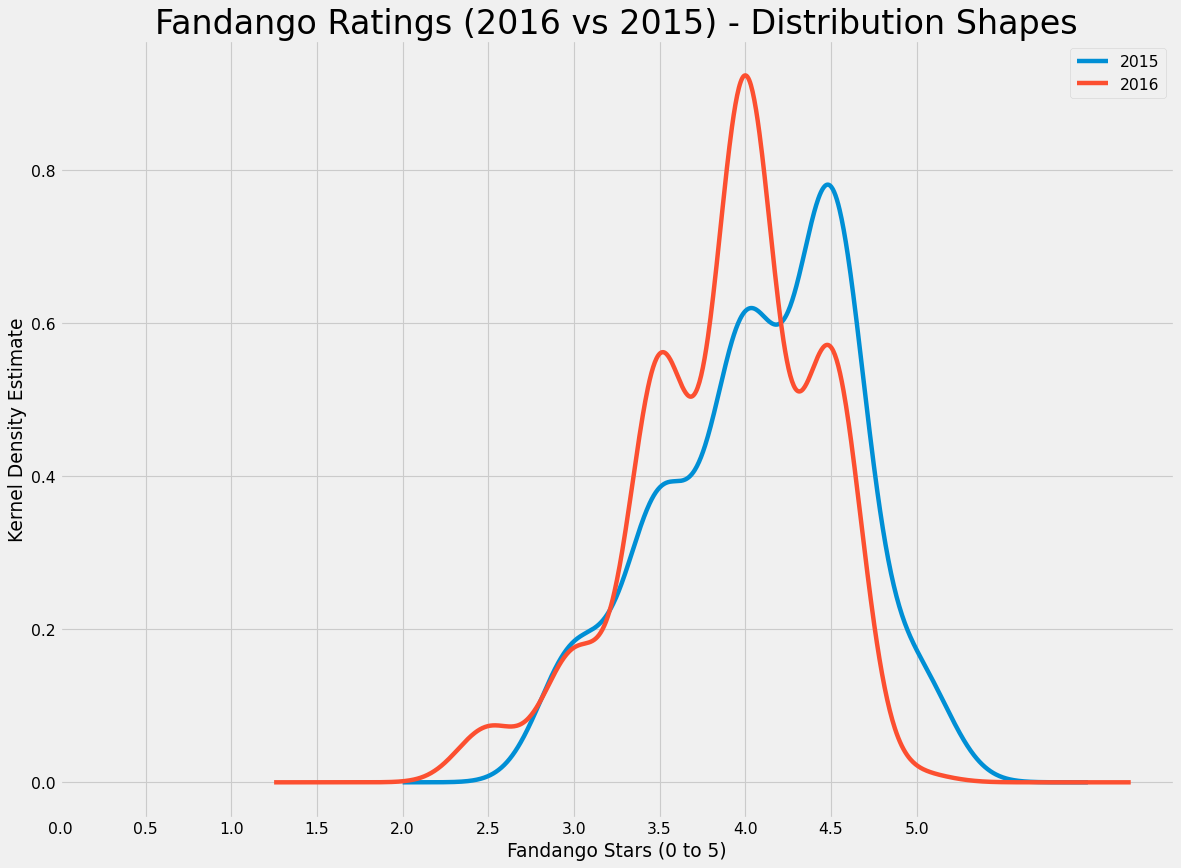

In [18]:
# use style fivethirtyeight
style.use('fivethirtyeight')

# Adjust plot figure size
figure(figsize=(16, 12), dpi=80)

# I do realise why not use rotten tomato ratings for df_after_clean as currently Fandango has replaced its
# rating systems with rotten tomato. However, this project is more to check retrospective
# Fandango ratings. Moreover, Rotten Tomato ratings is based on % and hence not directly
# comparable to the Before-Fix dataset's ratings for Fandango

# use 'Fandango_Stars' for KDE plots
df_before_clean['Fandango_Stars'].plot.kde(label='2015', legend=True)

# use 'fandango' to get ratings on fandango in existing dataset
df_after_clean['fandango'].plot.kde(label='2016', legend=True)

# x-axis starts at 0 and ends at 5 because movie ratings start at 0 and end at 5
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Fandango Stars (0 to 5)')  # x-label
plt.ylabel('Kernel Density Estimate')  # y-label
plt.title('Fandango Ratings (2016 vs 2015) - Distribution Shapes', size=30)  # adjust title size
# plt.title('KDE: Probability that a given X value will be at that range',fontsize=20, ha='center')  # ha: horizontal alignment

plt.show()

#### Findings (Comparing Distribution Shapes for 2015 and 2016):
- It would appear the KDE distribution peak has shifted left in 2016 to 4.0 stars (2015: 4.5 stars), suggesting that the Fandango rating bug fix may have happened, assuming no other variables affecting the results

- Both graphs are still slightly left-skewed, suggesting ratings are still generally more positive than negative

## 6) Comparing Relative Frequencies
Let us approach the analysis another way with more granular information using a Relative Frequency Table generated.

In [19]:
# Frequency tables with proportions/percentage
# sort_index so that the ratings are in order
df_before_freq = (df_before_clean['Fandango_Stars'].value_counts(normalize=True)*100).sort_index()
df_after_freq = (df_after_clean['fandango'].value_counts(normalize=True)*100).sort_index()

print("Before fix for year 2015 movies:\n", df_before_freq)
print("")
print("After fix for year 2016 movies:\n", df_after_freq)

Before fix for year 2015 movies:
 3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

After fix for year 2016 movies:
 2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


#### Findings (Comparing Relative Frequencies):

- The general ratings did indeed went down in year 2016 compared to 2015, consistent when we review distribution shapes.
- Year 2016 modes are 4.0/3.5 stars, about 40%/24% of population (2015: Modes are 4.5/4.0 stars, about 38%/29% population)
  - Overall modes percentages falling with slightly mixed signal

## 7) Determining The Direction Of The Change
- Review of Kernel density plots above has shown that the Fandango stars has dropped in year 2016 compared to year 2015.
- Another review of relative frequency tables (expressed in %) has supported the same finding on the change in direction.
- Let us perform another review by looking at population summary statistics (ie. mean, median, mode).

In [20]:
# Compute summary statistics for later charting
before_clean_mean = df_before_clean['Fandango_Stars'].mean()
before_clean_median = df_before_clean['Fandango_Stars'].median()
before_clean_mode = df_before_clean['Fandango_Stars'].mode()[0]

after_clean_mean = df_after_clean['fandango'].mean()
after_clean_median = df_after_clean['fandango'].median()
after_clean_mode = df_after_clean['fandango'].mode()[0]

# check transformation
print('Summary Statistics:')
print('=======================')
print('Before-Fix Mean: {:.2f}'.format(before_clean_mean))  # configure 2 decimal places with :.2f
print('Before-Fix Median: {:.2f}'.format(before_clean_median))
print('Before-Fix Mode: {:.2f}'.format(before_clean_mode))
print('=======================')  # outline borders
print('After-Fix Mean: {:.2f}'.format(after_clean_mean))
print('After-Fix Median {:.2f}'.format(after_clean_median))
print('After-Fix Mode {:.2f}'.format(after_clean_mode))
print('=======================')  # outline borders

Summary Statistics:
Before-Fix Mean: 4.09
Before-Fix Median: 4.00
Before-Fix Mode: 4.50
After-Fix Mean: 3.89
After-Fix Median 4.00
After-Fix Mode 4.00


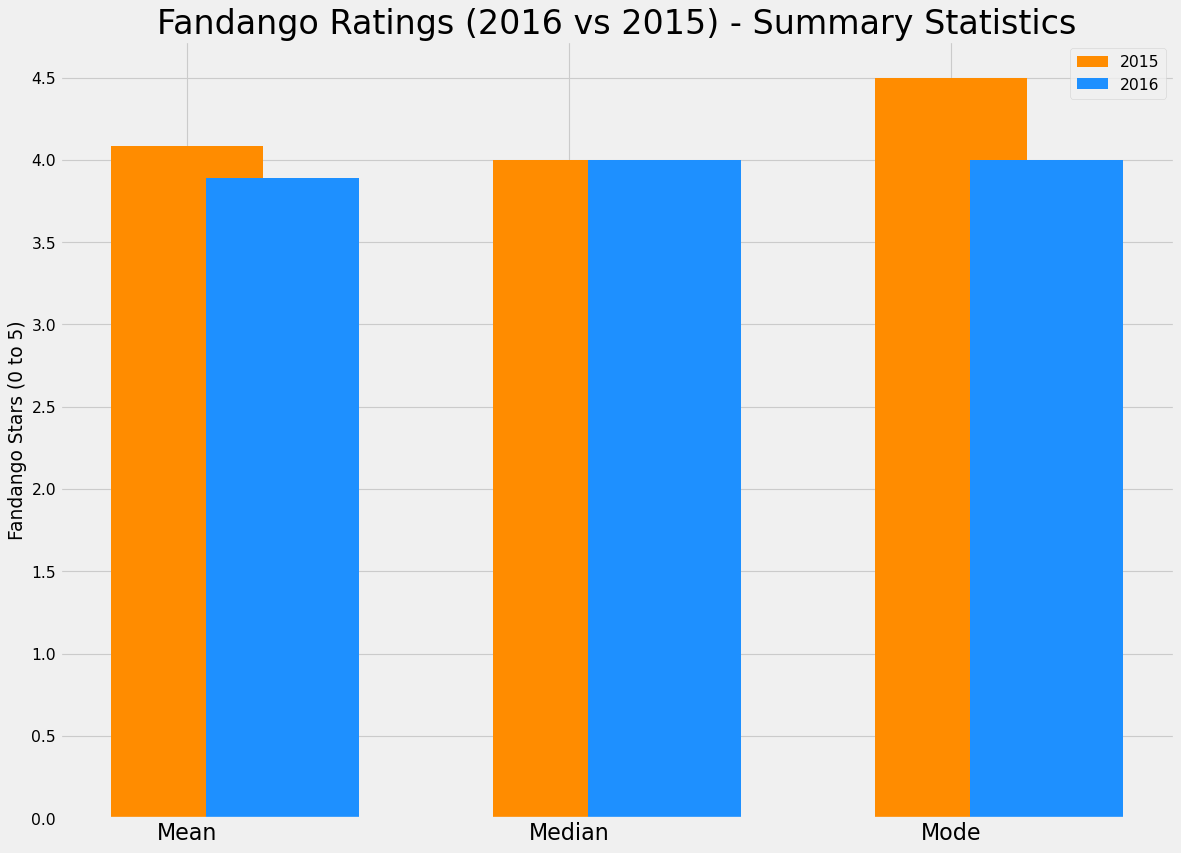

In [21]:
# Adjust plot figure size
figure(figsize=(16, 12), dpi=80)

# grouped bar plots using matplotlib
plt.bar(x=0, height=before_clean_mean, label='2015', color='darkorange')
plt.bar(x=2, height=before_clean_median, color='darkorange')
plt.bar(x=4, height=before_clean_mode, color='darkorange')

plt.bar(x=0.5, height=after_clean_mean, label='2016', color='dodgerblue')
plt.bar(x=2.5, height=after_clean_median, color='dodgerblue')
plt.bar(x=4.5, height=after_clean_mode, color='dodgerblue')

plt.xticks([0, 2, 4], ['Mean', 'Median', 'Mode'], size=20)  # set xticks interval and names, adjust fontsize
plt.yticks(np.arange(0, 5, 0.5))  # set yticks range and interval, numpy uses arange()

plt.ylabel('Fandango Stars (0 to 5)')

plt.title('Fandango Ratings (2016 vs 2015) - Summary Statistics', size=30)
plt.legend()
plt.show()

#### Findings (Determining The Direction Of The Change):
- Generally, summary statistics has dropped or remained unchanged in year 2016 compared to year 2015:
  - 2016 Mean has dropped to 3.89 (2015: 4.09)
  - 2016 Median remained unchange at 4.00 (2015: 4.00)
  - 2016 Mode has dropped to 4.00 (2015: 4.50)

## 8) Conclusion

#### Overall findings:
- Fandango Bug Fix does appear to have a noticeable effect, assuming that the trend of decreasing movie ratings is not due to worse movies being produced in year 2016 compared to year 2015.
  - It would appear the KDE distribution peak has shifted left in 2016 to 4.0 stars (2015: 4.5 stars), suggesting that the Fandango rating bug fix may have happened, assuming no other variables affecting the results.
  - Another review of relative frequency tables (expressed in %) has supported the same finding on the change in direction.
  - Generally, summary statistics has dropped or remained unchanged in year 2016 compared to year 2015.


#### What we have done in this notebook:
- Started by exploring and define project objectives based on background context
- Clean and transform data as needed, redefine project projectives if needed based on data suitability
- Compare statistical properties of 2 separate year groups, by exploring and illustrate using:
  - Kernel Density Estimate (KDE) plots
  - Relative Frequency Tables (expressed in percentages)
  - Grouped Bar Charts (Comparing statistical summary)
- Suggest conclusion to analysis.

#### Potential areas for further analysis and improve presentation:
- Compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating
- Collect recent movie ratings data and formulate your own research questions.
- Improve style and presentation of notebook (eg. using more features of FiveThirtyEight style)
